# Data Augmentation

In [ ]:
from leaknet.config import *
from leaknet.visualize import plot_samples
import os
import pandas as pd
import numpy as np
import tsaug

In [ ]:
def augment_data(augmented_per_sample, variance):
    augmentor = tsaug.AddNoise(scale=variance)
    
    # Remove old augmented files
    augment_data_dir = os.path.join(ROOT_DIR, DATA_AUGMENTED_DIR)
    for root, _, files  in os.walk(augment_data_dir):
        for file in files:
            os.remove(os.path.join(root, file))

    for root, _, files  in os.walk(os.path.join(ROOT_DIR, DATA_RAW_DIR)):
        for file in files:
            src = os.path.join(root, file)            
            dest = os.path.join(ROOT_DIR, DATA_AUGMENTED_DIR, os.path.basename(root))
        
            raw_data = pd.read_csv(src, index_col=0)
            raw_data.to_csv(os.path.join(dest, file), index=False)
            raw_data_copy = raw_data.copy()[["flow", "pressure"]].to_numpy().swapaxes(0, 1)
            
            for i in range(augmented_per_sample):
                augmented_file_name = file.removesuffix(".csv") + f"-aug-{i}.csv"
                augmented_data = augmentor.augment(raw_data_copy)
                
                augmented_file = raw_data.copy()
                augmented_file[["flow", "pressure"]] = np.maximum(augmented_data.T, 0)
                augmented_file.to_csv(os.path.join(dest, augmented_file_name), index=False)
            

In [93]:
augment_data(augmented_per_sample=5, variance=3e-5)

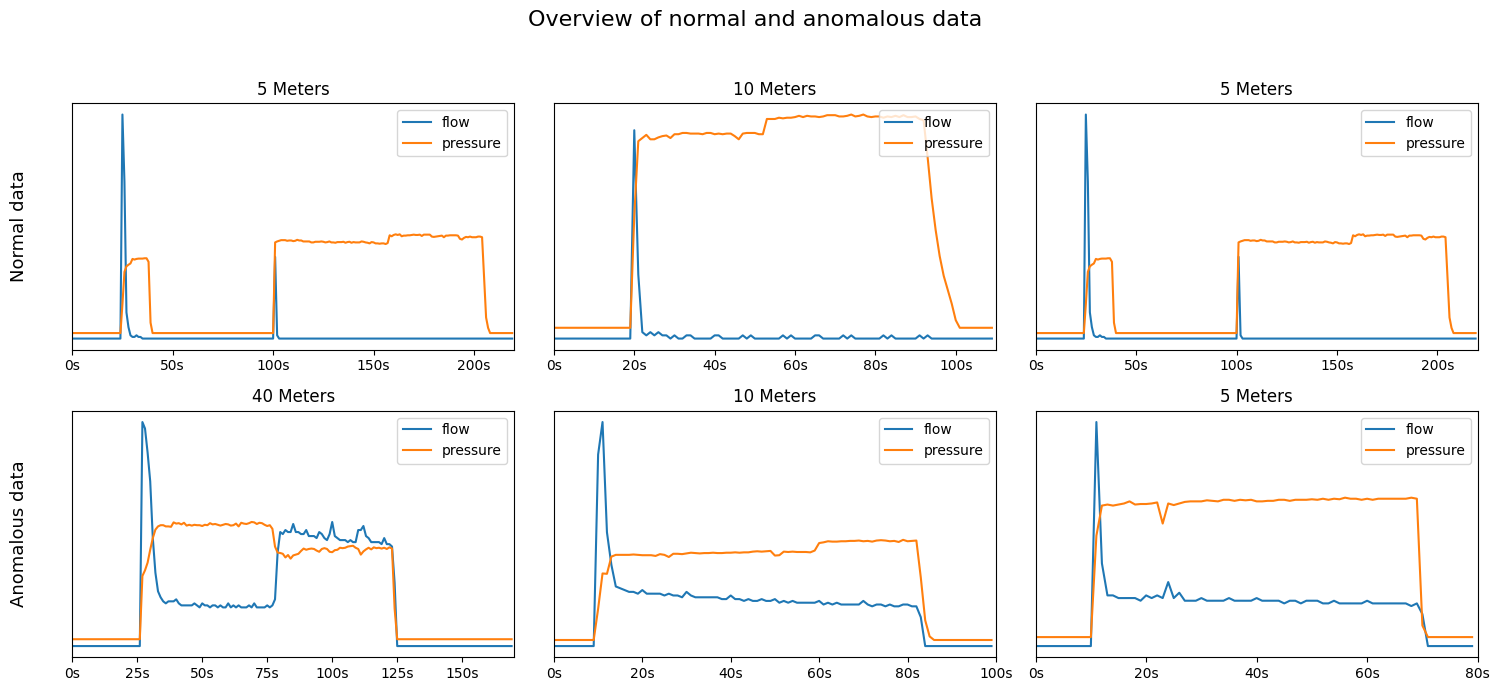

In [94]:
fig = plot_samples(os.path.join(ROOT_DIR, DATA_AUGMENTED_DIR))
fig.savefig(os.path.join(FIGURES_DIR, "aug_plot.png"), dpi=fig.dpi)